In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm

# Extract and edit data

In [2]:
filename = 'lab-results/lab_cubical_tessellation_on_torus2d/size{0}_exp{1}.csv'
sizes = np.arange(3, 36)
exps = np.arange(100)

In [3]:
dfs = {}
for size in sizes:
    dfs_exps = []
    for exp in exps:
        dfs_exps.append(pd.read_csv(filename.format(size, exp))[['Birth', 'Dimension']])
    dfs.update({size: dfs_exps})

In [4]:
assert np.all([[list(dfs[i][j]['Dimension']) == [0, 1, 1]  for i in sizes] for j in exps])

In [5]:
names = ['1st 0-dim cycle', '1st 1-dim cycle', '2nd 1-dim cycle']
values = {names[i] : pd.DataFrame({size : [dfs[size][exp]['Birth'][i] for exp in range(exp)] for size in sizes}) for i in range(3)}

# Draw Graph

In [6]:
colormaps = [cm['Greys'], cm['Oranges'], cm['Purples']]

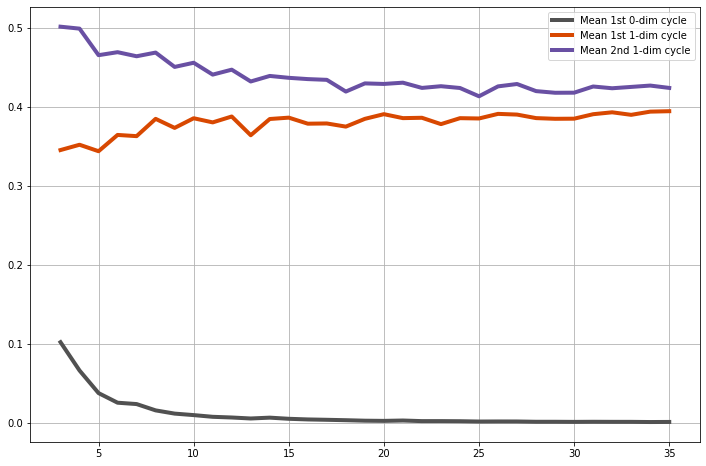

In [7]:
plt.figure(figsize=(12, 8))
for i in range(3):
    name = names[i]
    plt.plot(values[name].mean(), linewidth=4, color=colormaps[i](0.75), label='Mean ' + name)
plt.grid(True)
plt.legend()
plt.show()